In [1]:
# Importation des package
#pip install arch
#pip install yfinance
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import arch
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
import itertools
from scipy.stats import shapiro, jarque_bera
from statsmodels.stats.diagnostic import het_arch
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

# Prédiction de la volatilité du CAC 40

In [2]:

# Télécharger les données du CAC 40
index = '^FCHI'
start_date = '2000-01-01'
end_date = '2023-06-20'
data = yf.download(index, start=start_date, end=end_date, progress=False)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,6024.379883,6102.120117,5901.770020,5917.370117,5917.370117,0
2000-01-04,5922.229980,5925.069824,5657.200195,5672.020020,5672.020020,0
2000-01-05,5521.830078,5589.500000,5461.589844,5479.700195,5479.700195,0
2000-01-06,5485.930176,5530.259766,5388.850098,5450.109863,5450.109863,0
2000-01-07,5423.879883,5561.689941,5423.879883,5539.609863,5539.609863,0
...,...,...,...,...,...,...
2023-06-13,7290.310059,7308.000000,7244.419922,7290.799805,7290.799805,65501800
2023-06-14,7290.939941,7358.990234,7288.459961,7328.529785,7328.529785,66153600
2023-06-15,7304.970215,7313.470215,7246.330078,7290.910156,7290.910156,60422800


## Analyse de l'évolution de la série

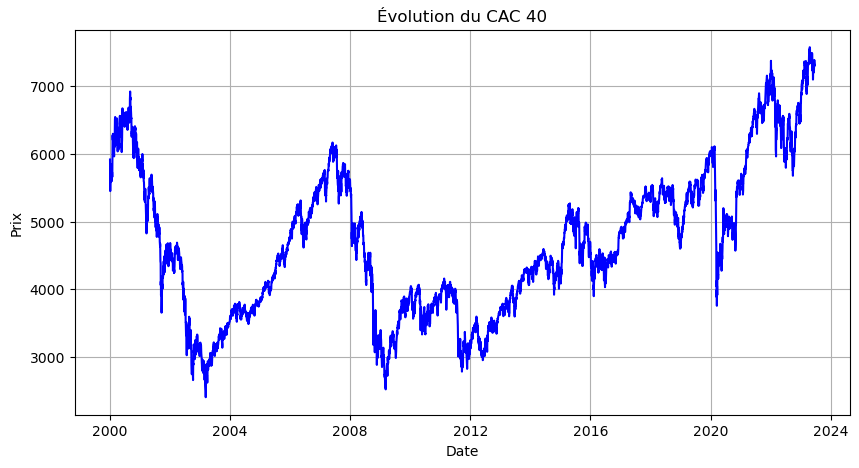

/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


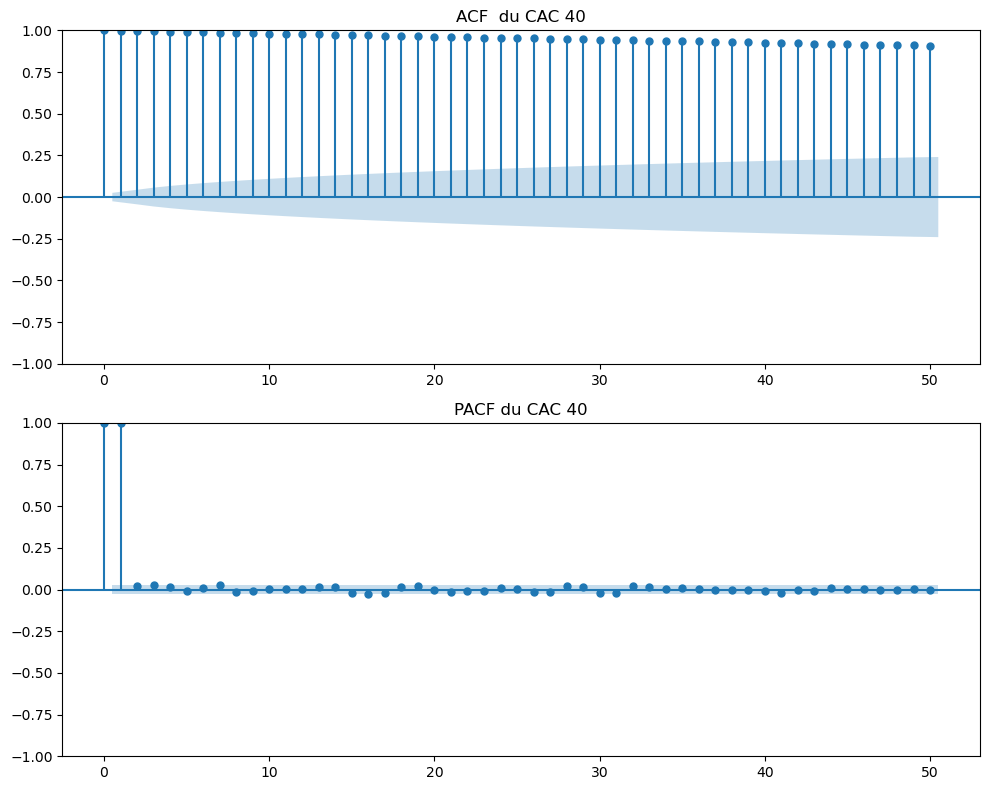

In [3]:
# Sélectionner la série de prix
indiceCAC40 = data['Adj Close']



# Afficher l'évolution du CAC 40
plt.figure(figsize=(10, 5))
plt.plot(indiceCAC40.index, indiceCAC40, color='blue')
plt.title('Évolution du CAC 40')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.grid(True)
plt.show()

# Tracer l'ACF et le PACF des rendements
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(indiceCAC40, lags=50, ax=ax1)
ax1.set_title('ACF  du CAC 40')
plot_pacf(indiceCAC40, lags=50, ax=ax2)
ax2.set_title('PACF du CAC 40')
plt.tight_layout()
plt.show()





## Analyse du rendement du CAC 40

Le rendement est calculé en utilisant la formule suivante :

$$ R_t = \frac{P_t - P_{t-1}}{P_{t-1}} $$

Où :
- $ R_t $ est le rendement à l'instant t
- $ P_t $ est le prix à l'instant t
- $ P_{t-1} $ est le prix à l'instant t-1


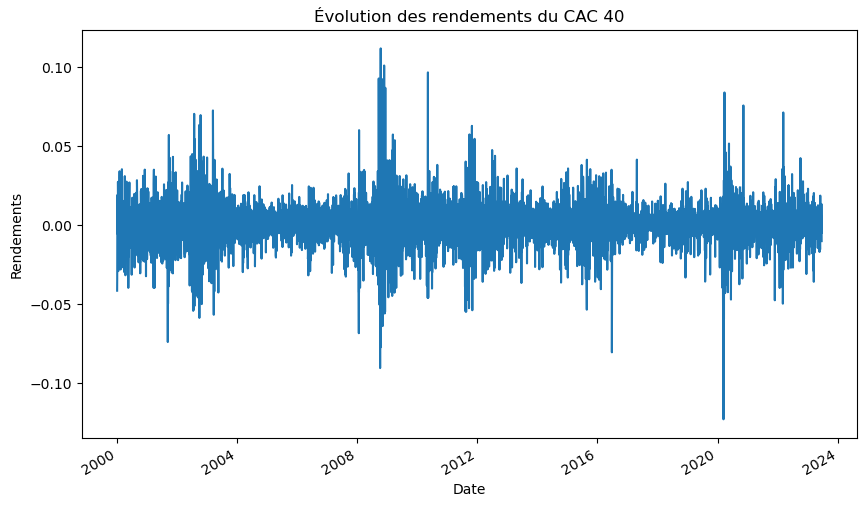

/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


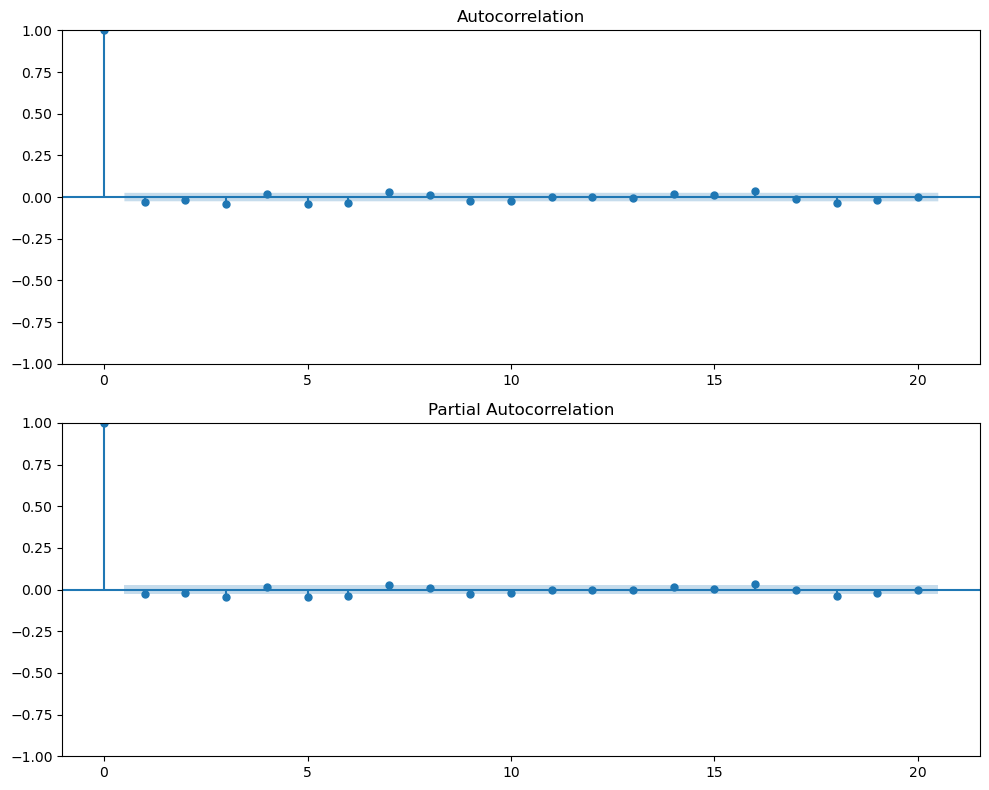

In [4]:
# Sélectionner la série de prix à prévoir
returns = data['Adj Close'].pct_change().dropna()

# Analyse de l'évolution des rendements
returns.plot(figsize=(10, 6))
plt.title('Évolution des rendements du CAC 40')
plt.xlabel('Date')
plt.ylabel('Rendements')
plt.show()

# Calcul de l'ACF et du PACF
fig, ax = plt.subplots(nrows=2, figsize=(10, 8))
plot_acf(returns, ax=ax[0], lags=20, alpha=0.05)
plot_pacf(returns, ax=ax[1], lags=20, alpha=0.05)

plt.tight_layout()
plt.show()

In [5]:

# Test de stationnarité - Test augmenté de Dickey-Fuller (ADF)
result = adfuller(returns)
print('Statistique du test ADF:', result[0])
print('Valeur critique 1%:', result[4]['1%'])
print('Valeur critique 5%:', result[4]['5%'])
print('Valeur critique 10%:', result[4]['10%'])
print('P-value:', result[1])
print('Est stationnaire ?', 'Oui' if result[1] < 0.05 else 'Non')

Statistique du test ADF: -14.078091571139172
Valeur critique 1%: -3.4314471184403708
Valeur critique 5%: -2.8620248249490774
Valeur critique 10%: -2.5670280699432513
P-value: 2.8608980151230347e-26
Est stationnaire ? Oui


## Analyse du carré du rendement

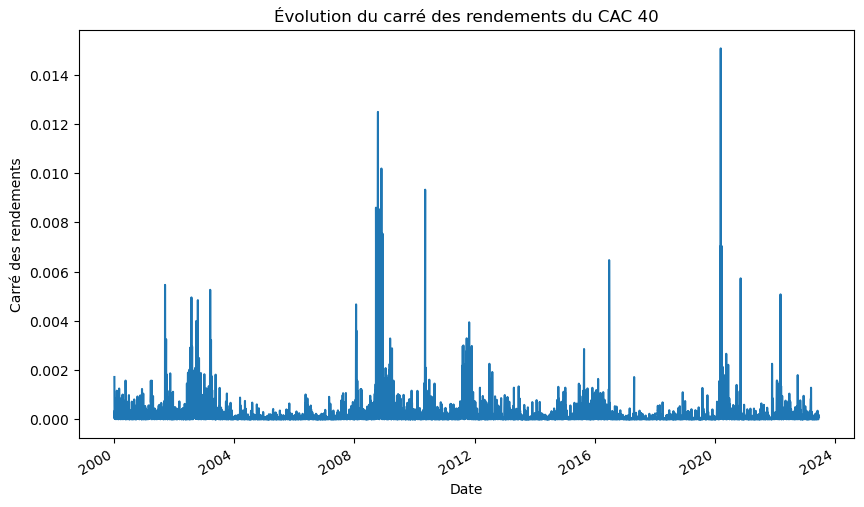

/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


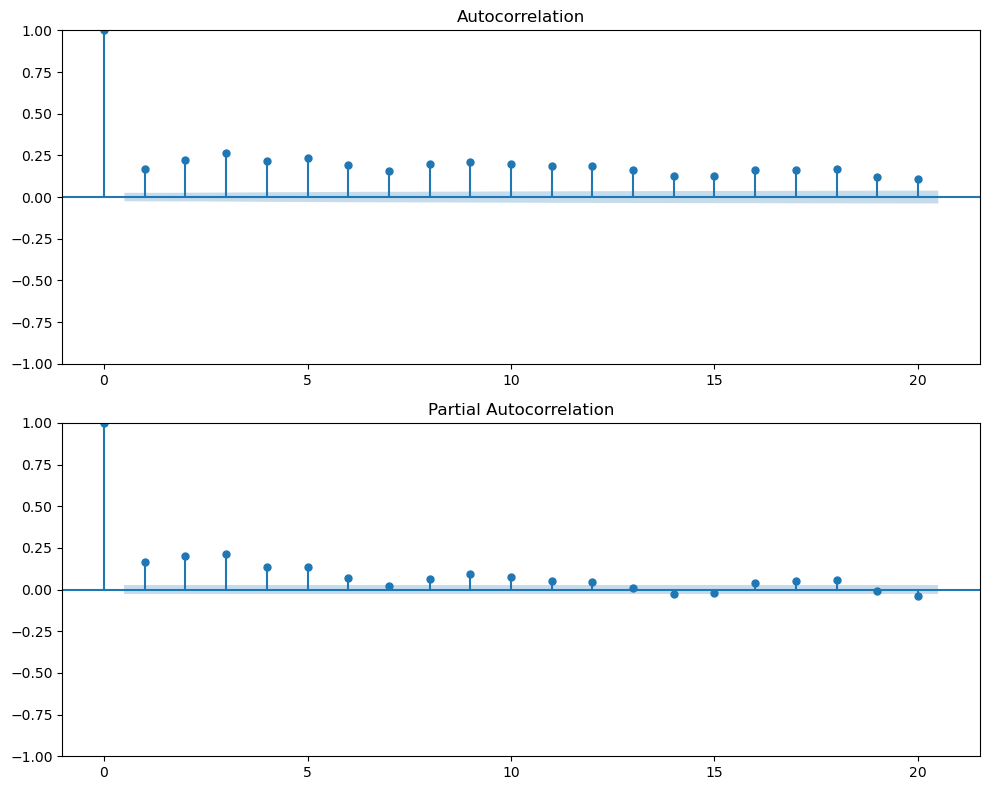

In [6]:
# Analyse du carré des rendements
returns_squared = returns ** 2
returns_squared.plot(figsize=(10, 6))
plt.title("Évolution du carré des rendements du CAC 40")
plt.xlabel("Date")
plt.ylabel("Carré des rendements")
plt.show()

# Calcul de l'ACF et du PACF du carré des rendements
fig, ax = plt.subplots(nrows=2, figsize=(10, 8))
plot_acf(returns_squared, ax=ax[0], lags=20, alpha=0.05)
plot_pacf(returns_squared, ax=ax[1], lags=20, alpha=0.05)

plt.tight_layout()
plt.show()


## Construction du modèle GARCH(p,q)

Le modèle GARCH (Generalized Autoregressive Conditional Heteroskedasticity) est défini par l'équation suivante :

$$ \epsilon_t = \sigma_t \cdot z_t $$

$$ \sigma_t^2 = \omega + \sum_{i=1}^{p} \alpha_i \cdot \epsilon_{t-i}^2 + \sum_{j=1}^{q} \beta_j \cdot \sigma_{t-j}^2 $$

Où :
- $ \epsilon_t $ est le processus d'innovation à l'instant t
- $ \sigma_t^2 $ est la variance conditionnelle à l'instant t
- $ \omega $ est le terme constant (offset)
- $ \alpha_i $ sont les coefficients GARCH (mesures de la volatilité passée) pour les retards i
- $ \epsilon_{t-i}^2 $ sont les carrés des erreurs résiduelles aux instants t-i
- $ \beta_j $ sont les coefficients ARCH (mesures de l'hétéroscédasticité passée) pour les retards j
- $ \sigma_{t-j}^2 $ sont les variances conditionnelles aux instants t-j
- $ z_t $ est un bruit blanc gaussien standardisé à l'instant t


In [7]:
data['Return'] = data['Adj Close'].pct_change()
data['Squared_Return'] = data['Return'] ** 2
data=data.dropna()

In [8]:
# Définir le rang de p et q
p_range = range(1, 4)  
q_range = range(0, 4)  

# Initialiser le DataFrame pour stocker les résultats
results_df = pd.DataFrame(columns=['p', 'q', 'aic'])

# Boucle sur toutes les combinaisons possibles de p et q
for p in p_range:
    for q in q_range:
            # Spécifier le modèle GARCH
            model = arch.arch_model(data['Return'], vol='Garch', p=p, q=q)
            
            # Adapter le modèle
            results = model.fit(disp='off')  # turn off convergence messages

            # Obtenir l'AIC
            aic = results.aic

            # Ajouter les résultats dans le DataFrame
            results_df = results_df.append({'p': p, 'q': q, 'aic': aic}, ignore_index=True)




/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002003. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_8450/889345126.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'p': p, 'q': q, 'aic': aic}, ignore_index=True)
/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. 

In [9]:
# Afficher les résultats
print(results_df.sort_values(by='aic'))

      p    q           aic
5   2.0  1.0 -36123.846634
11  3.0  3.0 -36121.678480
10  3.0  2.0 -36111.401671
9   3.0  1.0 -36110.535564
6   2.0  2.0 -36099.632628
7   2.0  3.0 -36095.148800
8   3.0  0.0 -34992.656846
4   2.0  0.0 -34663.930669
0   1.0  0.0 -34039.164373
2   1.0  2.0 -19227.367909
3   1.0  3.0   1558.766964
1   1.0  1.0   7702.347411


In [10]:
model = arch.arch_model(data['Return'], vol='Garch', p=3, q=0)
results = model.fit()
print(results.summary())


Iteration:      1,   Func. Count:      7,   Neg. LLF: 38448172244.81701
Iteration:      2,   Func. Count:     21,   Neg. LLF: 57702216571.078735
Iteration:      3,   Func. Count:     36,   Neg. LLF: 7036754521.777357
Optimization terminated successfully    (Exit mode 0)
            Current function value: -17501.328423192455
            Iterations: 3
            Function evaluations: 46
            Gradient evaluations: 3
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                17501.3
Distribution:                  Normal   AIC:                          -34992.7
Method:            Maximum Likelihood   BIC:                          -34959.2
                                        No. Observations:                 5996
Date:                

/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002003. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


## Validation du modèle


/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistique de Shapiro-Wilk: 0.9347320199012756, p-value: 2.802596928649634e-45


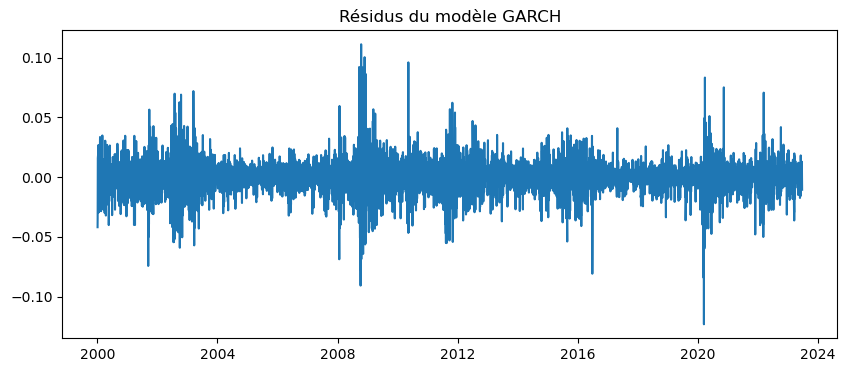

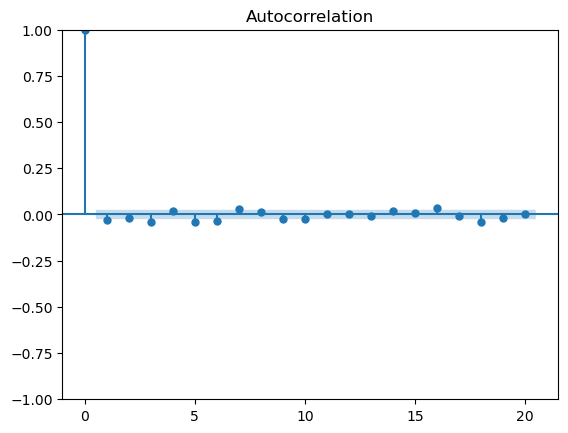

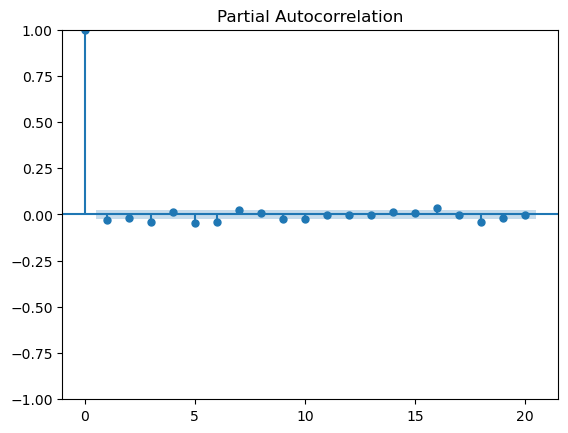

In [11]:
# Plot des résidus
plt.figure(figsize=(10,4))
plt.plot(results.resid)
plt.title("Résidus du modèle GARCH")

# ACF et PACF
plot_acf(results.resid, lags=20)
plot_pacf(results.resid, lags=20)

# Test de Shapiro-Wilk pour la normalité
stat, p = shapiro(results.resid)
print(f'Statistique de Shapiro-Wilk: {stat}, p-value: {p}')


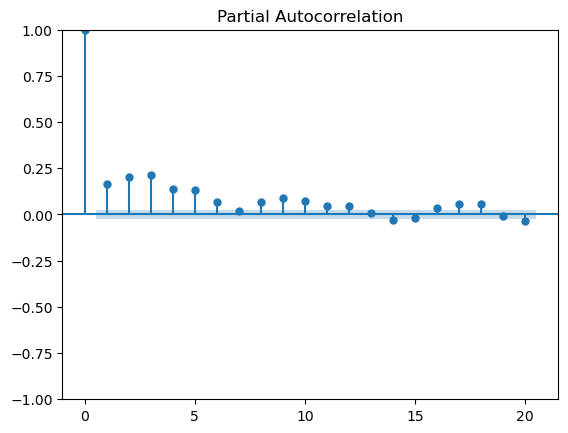

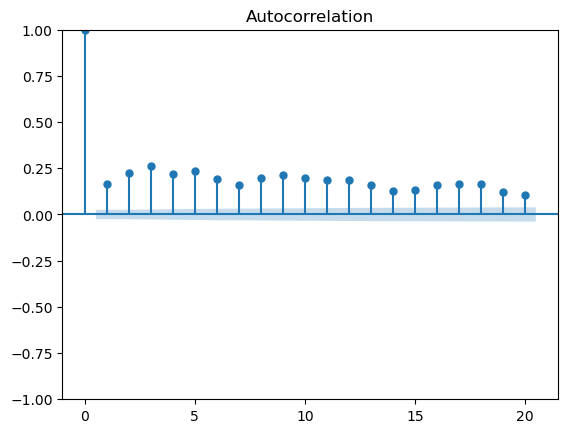

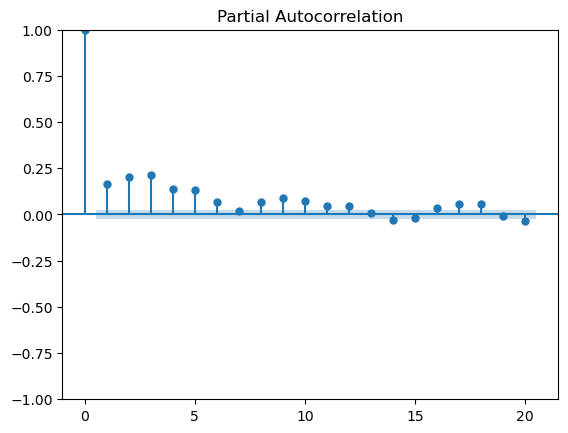

In [12]:
# Analyse du carré des résidus

# ACF et PACF des carrés des résidus
plot_acf(results.resid**2, lags=20)
plot_pacf(results.resid**2, lags=20)


In [13]:
# Ljung-Box test sur résidus
lb_test_resid = acorr_ljungbox(results.resid, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur résidus:\n", lb_test_resid)

# Ljung-Box test sur carrés des résidus
lb_test_resid_sq = acorr_ljungbox(results.resid**2, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur carrés des résidus:\n", lb_test_resid_sq)


Ljung-Box Test sur résidus:
       lb_stat     lb_pvalue
1    4.490473  3.408425e-02
2    7.037444  2.963728e-02
3   17.401665  5.842588e-04
4   19.164003  7.297218e-04
5   30.014173  1.465415e-05
6   37.853279  1.200039e-06
7   43.011398  3.318765e-07
8   44.123685  5.391474e-07
9   48.176369  2.367352e-07
10  51.580741  1.364239e-07
11  51.612115  3.204853e-07
12  51.613936  7.256353e-07
Ljung-Box Test sur carrés des résidus:
         lb_stat      lb_pvalue
1    165.793256   6.138007e-38
2    463.738556  1.997340e-101
3    882.525309  5.462093e-191
4   1174.682216  4.904864e-253
5   1511.499871   0.000000e+00
6   1735.780300   0.000000e+00
7   1888.604833   0.000000e+00
8   2129.002362   0.000000e+00
9   2401.159142   0.000000e+00
10  2638.514547   0.000000e+00
11  2844.364346   0.000000e+00
12  3054.060153   0.000000e+00


##### Test de Lagrange Multiplier (LM) pour l'effet ARCH

Le test de Lagrange Multiplier (LM) pour l'effet ARCH est un outil statistique qui vérifie la présence d'effets ARCH (AutoRegressive Conditional Heteroskedasticity) dans une série temporelle.



L'effet ARCH se manifeste lorsque la variance d'une erreur est une fonction de ses erreurs passées. Cette propriété est courante dans les séries temporelles financières, où de grandes variations des rendements sont souvent suivies par de grandes variations et vice versa.

Le test de LM vérifie l'hypothèse nulle que les erreurs sont homoscédastiques (variance constante). Si la p-value du test est inférieure à un seuil prédéfini (généralement 0,05), l'hypothèse nulle est rejetée, indiquant la présence d'effets ARCH.


In [14]:
# LM test pour les effets ARCH
lm_test = het_arch(results.resid)
print('LM Test Statistique: %.3f, p-value: %.3f' % (lm_test[0], lm_test[1]))


LM Test Statistique: 972.232, p-value: 0.000


## Prévisions glissantes

In [15]:
import numpy as np
rolling_predictions = []
test_size = 365*2

for i in range(test_size):
    train = data['Return'][:-(test_size-i)]
    model = arch.arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002092. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataS

In [16]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

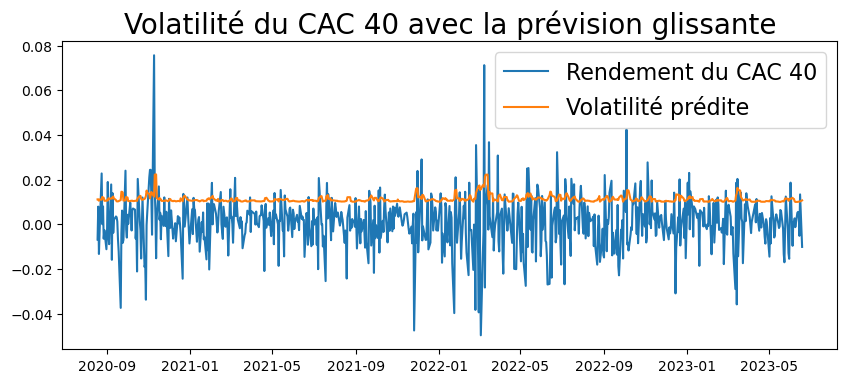

In [17]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatilité du CAC 40 avec la prévision glissante', fontsize=20)
plt.legend(['Rendement du CAC 40', 'Volatilité prédite'], fontsize=16)

## Comment peut-on utiliser ce modèle

In [18]:
train = data['Return']
model = arch.arch_model(train, p=3, q=0)
model_fit = model.fit(disp='off')

/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002003. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [19]:
pred = model_fit.forecast(horizon=7)
future_dates = [data.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Text(0.5, 1.0, 'Prédiction de Volatilité - 7 Prochains Jours')

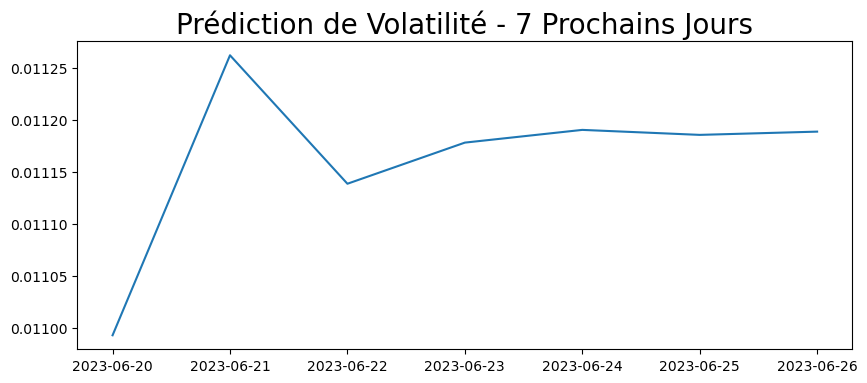

In [20]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Prédiction de Volatilité - 7 Prochains Jours', fontsize=20)

# Volatilité de l'action d'Apple

In [21]:
# Définir l'indice et les dates de début et de fin
index = 'AAPL'
start_date = '2000-01-01'
end_date = '2023-06-20'

# Importer les données
data_apple = yf.download(index, start=start_date, end=end_date, progress=False)

# Calculer les rendements
data_apple['Return'] = data_apple['Adj Close'].pct_change().dropna()
data_apple=data_apple.dropna()
data_apple

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.777850,512377600,-0.084310
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.789232,778321600,0.014633
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.720933,767972800,-0.086539
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.755083,460734400,0.047369
2000-01-10,0.910714,0.912946,0.845982,0.872768,0.741803,505064000,-0.017588
...,...,...,...,...,...,...,...
2023-06-12,181.270004,183.889999,180.970001,183.789993,183.789993,54274900,0.015639
2023-06-13,182.800003,184.149994,182.440002,183.309998,183.309998,54929100,-0.002612
2023-06-14,183.369995,184.389999,182.020004,183.949997,183.949997,57462900,0.003491


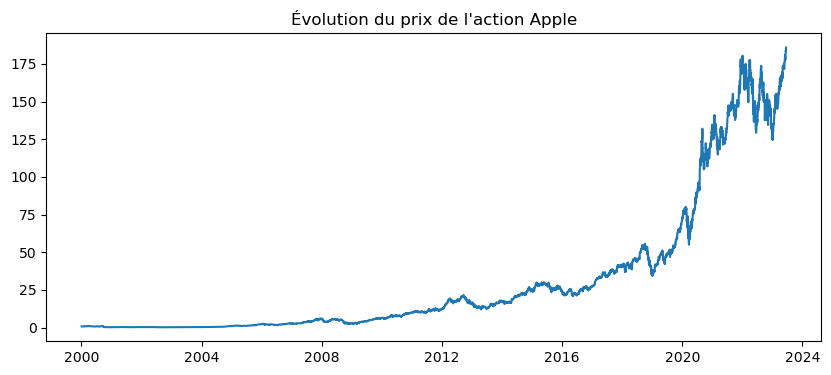

In [22]:
# Tracer l'évolution des prix
plt.figure(figsize=(10,4))
plt.plot(data_apple.index, data_apple['Adj Close'])
plt.title('Évolution du prix de l\'action Apple')
plt.show()


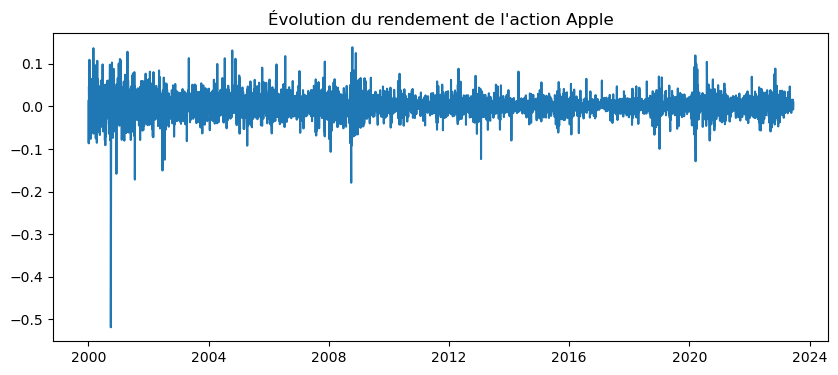

In [23]:
# Tracer l'évolution des rendements
plt.figure(figsize=(10,4))
plt.plot(data_apple.index, data_apple['Return'])
plt.title('Évolution du rendement de l\'action Apple')
plt.show()


In [24]:
# Spécifier le modèle GARCH
model_apple = arch.arch_model(data_apple['Return'], vol='Garch', p=3, q=0)
# Adapter le modèle
results_appel = model_apple.fit()
# Afficher le sommaire
print(results_appel.summary())


Iteration:      1,   Func. Count:      7,   Neg. LLF: 16637831369.592289
Iteration:      2,   Func. Count:     20,   Neg. LLF: -13770.711803498565
Optimization terminated successfully    (Exit mode 0)
            Current function value: -13770.711779195175
            Iterations: 6
            Function evaluations: 20
            Gradient evaluations: 2
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                13770.7
Distribution:                  Normal   AIC:                          -27531.4
Method:            Maximum Likelihood   BIC:                          -27498.0
                                        No. Observations:                 5901
Date:                Wed, Jun 21 2023   Df Residuals:                     5900
Time:       

/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006225. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [25]:
# Ljung-Box test sur résidus
lb_test_resid = acorr_ljungbox(results_appel.resid, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur résidus:\n", lb_test_resid)

# Ljung-Box test sur carrés des résidus
lb_test_resid_sq = acorr_ljungbox(results_appel.resid**2, lags=[i for i in range(1, 13)], return_df=True)
print("Ljung-Box Test sur carrés des résidus:\n", lb_test_resid_sq)

Ljung-Box Test sur résidus:
       lb_stat  lb_pvalue
1   11.124179   0.000852
2   11.964627   0.002523
3   13.388733   0.003867
4   23.479112   0.000102
5   24.512230   0.000173
6   24.557287   0.000412
7   28.437654   0.000183
8   32.767869   0.000068
9   33.289342   0.000119
10  38.791893   0.000028
11  39.295838   0.000047
12  45.375015   0.000009
Ljung-Box Test sur carrés des résidus:
        lb_stat     lb_pvalue
1    21.824731  2.987249e-06
2    34.276424  3.605529e-08
3    39.630927  1.275797e-08
4    46.755835  1.714336e-09
5    55.061311  1.267995e-10
6    65.417400  3.545097e-12
7    68.930350  2.429666e-12
8    74.523763  6.143597e-13
9    86.482380  8.247668e-15
10  104.850996  5.802482e-18
11  107.553817  5.636265e-18
12  111.198388  3.466172e-18


In [26]:
pred = results_appel.forecast(horizon=7)
future_dates = [data_apple.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Text(0.5, 1.0, 'Prédiction de Volatilité - 7 Prochains Jours')

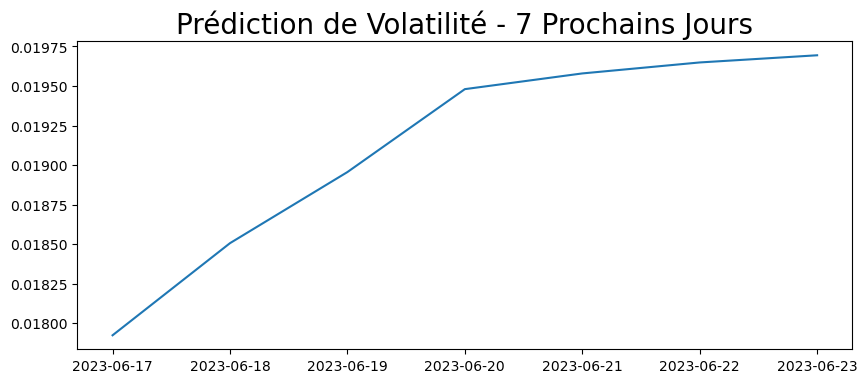

In [27]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Prédiction de Volatilité - 7 Prochains Jours', fontsize=20)

In [28]:
import numpy as np
rolling_predictions = []
test_size = 365*2

for i in range(test_size):
    train = data_apple['Return'][:-(test_size-i)]
    model = arch.arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006548. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/Users/natachanjongwayepnga/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataS

In [29]:
rolling_predictions = pd.Series(rolling_predictions, index=data_apple.index[-test_size:])

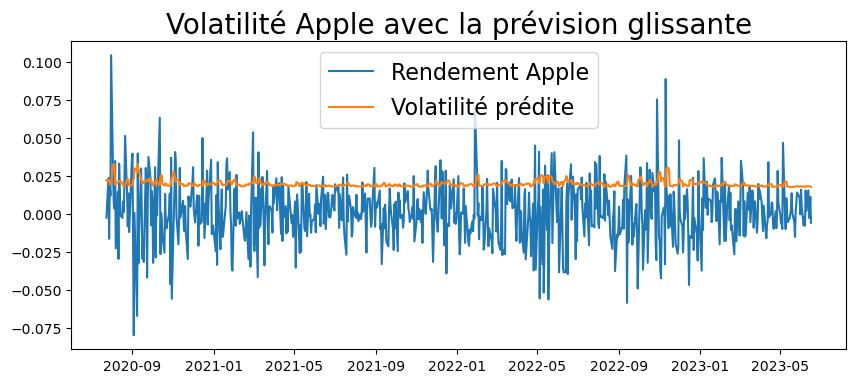

In [30]:
plt.figure(figsize=(10,4))
true, = plt.plot(data_apple['Return'][-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatilité Apple avec la prévision glissante', fontsize=20)
plt.legend(['Rendement Apple', 'Volatilité prédite'], fontsize=16)